# 2.2 신경망을 위한 데이터 표현
- **텐서**(tensor) : 다차원 넘파이 배열, 데이터를 위한 컨테이너
- 2D 텐서 : 행렬
- 텐서에서는 **차원**(dimension)을 **축**(axis)이라고 부름

## 2.2.1 스칼라(0D 텐서)
- **스칼라**(scalar) : 하나의 숫자만 담고 있는 텐서
- `float32`나 `float64` 타입의 숫자
- `ndim` 속성을 사용하면 축 개수를 확인할 수 있으며 스칼라 텐서의 축 개수는 0
- 텐서의 축 개수를 **랭크**(rank)라고도 부름

In [1]:
import numpy as np

x = np.array(12)

In [2]:
x, x.ndim

(array(12), 0)

## 2.2.2 벡터(1D 텐서)
- **벡터**(vector) : 숫자의 배열
- 딱 하나의 축을 가짐

In [3]:
x = np.array([12, 3, 6, 14, 7])

In [4]:
x, x.ndim

(array([12,  3,  6, 14,  7]), 1)

- 5개의 원소를 가지고 있으므로 5차원 벡터라고 부름
    - 5D 벡터와 5D 텐서(랭크 5인 텐서)를 혼동하면 안 됨
- **차원수**(dimensionality) : 특정 축을 따라 놓인 원소의 개수

## 2.2.3 행렬(2D 텐서)
- **행렬**(matrix) : 벡터의 배열
- 2개의 축 : **행**(row)과 **열**(column)

In [6]:
x = np.arange(0, 15, 1).reshape((3, 5))
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [7]:
x.ndim

2

- 첫 번째 행 : [0, 1, 2, 3, 4]
- 첫 번째 열 : [0, 5, 10]

## 2.2.4 3D 텐서와 고차원 텐서
- 직육면체 형태로 해석할 수 있는 3D 텐서

In [9]:
x = np.arange(0, 45, 1).reshape((3, 3, 5))
x

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]],

       [[15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]],

       [[30, 31, 32, 33, 34],
        [35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44]]])

In [10]:
x.ndim

3

- 딥러닝에서는 보통 0D에서 4D까지의 텐서를 다룸
- 동영상 데이터를 다룰 경우 5D 텐서까지 다루기도 함

## 2.2.5 핵심 속성
- **축의 개수(랭크)** : `ndim` 속성에 저장되어 있는 축의 개수
- **크기**(shape) : 각 축을 따라 얼마나 많은 차원이 있는지를 튜플로 나타낸 것
    - 행렬은 `(3, 5)`, 3D 텐서는 `(3, 3, 5)`, 벡터는 `(5,)`, 스칼라는 `()`로 크기가 없음
- **데이터 타입**(넘파이 dtype) : `float32`, `unit8`, `float64` 등
    - 드물게 `char` 타입을 사용하며, 텐서는 사전에 할당되어 연속된 메로리에 저장되어야 하므로 가변 길이의 문자열을 지원하지 않음

### MNIST 데이터셋
- 8비트 정수형 3D 텐서
- 28x28 크기의 정수 행렬 6만개가 있는 배열

In [11]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [12]:
print(train_images.ndim)

3


In [13]:
print(train_images.shape)

(60000, 28, 28)


In [14]:
print(train_images.dtype)

uint8


### 다섯 번째 이미지 출력하기

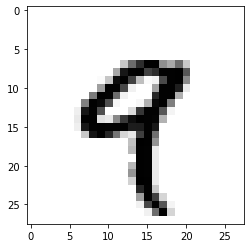

In [15]:
digit = train_images[4]

import matplotlib.pyplot as plt

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## 2.2.6 넘파이로 텐서 조작하기
- **슬라이싱**(slicing) : 배열에 있는 특정 원소들을 선택하는 것

In [16]:
my_slice = train_images[10:100]

In [17]:
print(my_slice.shape)

(90, 28, 28)


- 정중앙에 위치한 14x14 픽셀 조각

In [18]:
my_slice = train_images[:, 7:-7, 7:-7]

In [19]:
print(my_slice.shape)

(60000, 14, 14)


## 2.2.7 배치 데이터
- 일반적으로 딥러닝에서 사용하는 모든 데이터 텐서의 첫 번째 축은 **샘플 축**(sample axis)
- 딥러닝 모델은 한 번에 전체 데이터셋을 처리하지 않는 대신 작은 배치(batch)로 나눔
- 배치 데이터를 다룰 때 첫 번째 축을 **배치 축**(batch axis) 또는 **배치 차원**(batch dimension)이라고 부름

## 2.2.8 텐서의 실제 사례
- **벡터 데이터** : `(samples, features)` 크기의 2D 텐서
- **시계열 데이터** 또는 **시퀀스**(sequence) **데이터** : `(samples, timesteps, features)` 크기의 3D 텐서
- **이미지** : `(samples, height, width, channels)` 또는 `(samples, channels, height, width)` 크기의 4D 텐서
- **동영상** : `(samples, framses, height, width, channels)` 또는 `(samples, frames, channels, height, width)` 크기의 5D 텐서

## 2.2.9 벡터 데이터
- **샘플 축**과 **특성 축**(feature axis)로 이루어진 데이터

## 2.2.10 시계열 데이터 또는 시퀀스 데이터
- 시간 또는 연속된 순서가 중요할 때는 시간 축을 포함하여 3D 텐서로 저장
- 주식 가격 데이터셋 : 미국 기준 1분마다 현재, 최고, 최소 가격을 저장하면 하루 동안 `(390, 3)` 크기의 2D 텐서로 인코딩 되며 250일치 데이터는 `(250, 390, 3)` 크기의 3D 텐서로 저장
    - 1일치 데이터가 하나의 샘플

## 2.2.11 이미지 데이터
- 흑백 이미지의 경우 컬러 채널의 차원 크기는 1
- 256x256 크기의 흑백 이미지에 대한 128개 배치는 `(128, 256, 256, 1)` 크기의 텐서에 저장
- 컬러 이미지는 `(128, 256, 256, 3)` 크기의 텐서에 저장
- **채널 마지막**(channel-last) 방식 : 텐서플로에서 사용하는 방식으로 `(samples, height, width, channels)`
- **채널 우선**(channel-firts) 방식 : 씨아노에서 사용하는 방식으로 `(samples, channels, height, width)`
- 일상생활에서 이미지의 크기는 보통 너비 x 높이로 말하지만 행렬에서는 행이 먼저 나오므로 높이 x 너비로 표현

## 2.2.12 비디오 데이터
- 60초짜리 144x256 유튜브 비디오 클립을 초당 4프레임으로 샘플링하면 240프레임이 되며
    - 이런 비디오 클립을 4개 가진 배치는 `(4, 240, 144, 256, 3)` 크기의 텐서에 저장되며
    - `dtype`을 `float32`로 했다면 각 값이 32비트로 저장되어 405MB가 됨